In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
airlines=pd.read_excel(r"C:\Users\Shiva\Desktop\ExcelR assignments\Forecasting\Airlines+Data.xlsx")

In [4]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Plotting the data

<Axes: >

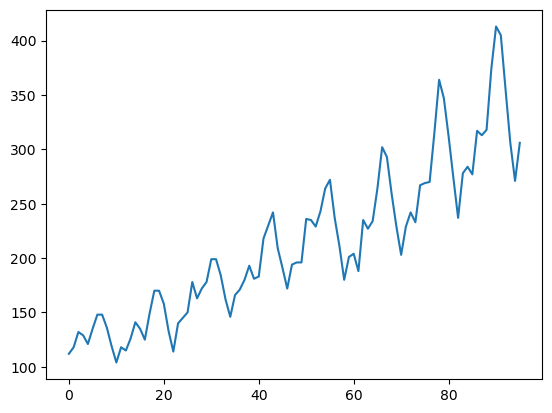

In [5]:
airlines.Passengers.plot()

In [6]:
len(airlines)

96

### Splitting train and test data

In [7]:
train=airlines.head(80)
test=airlines.tail(16)

In [8]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364


In [9]:
test

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374


### Plotting moving averages

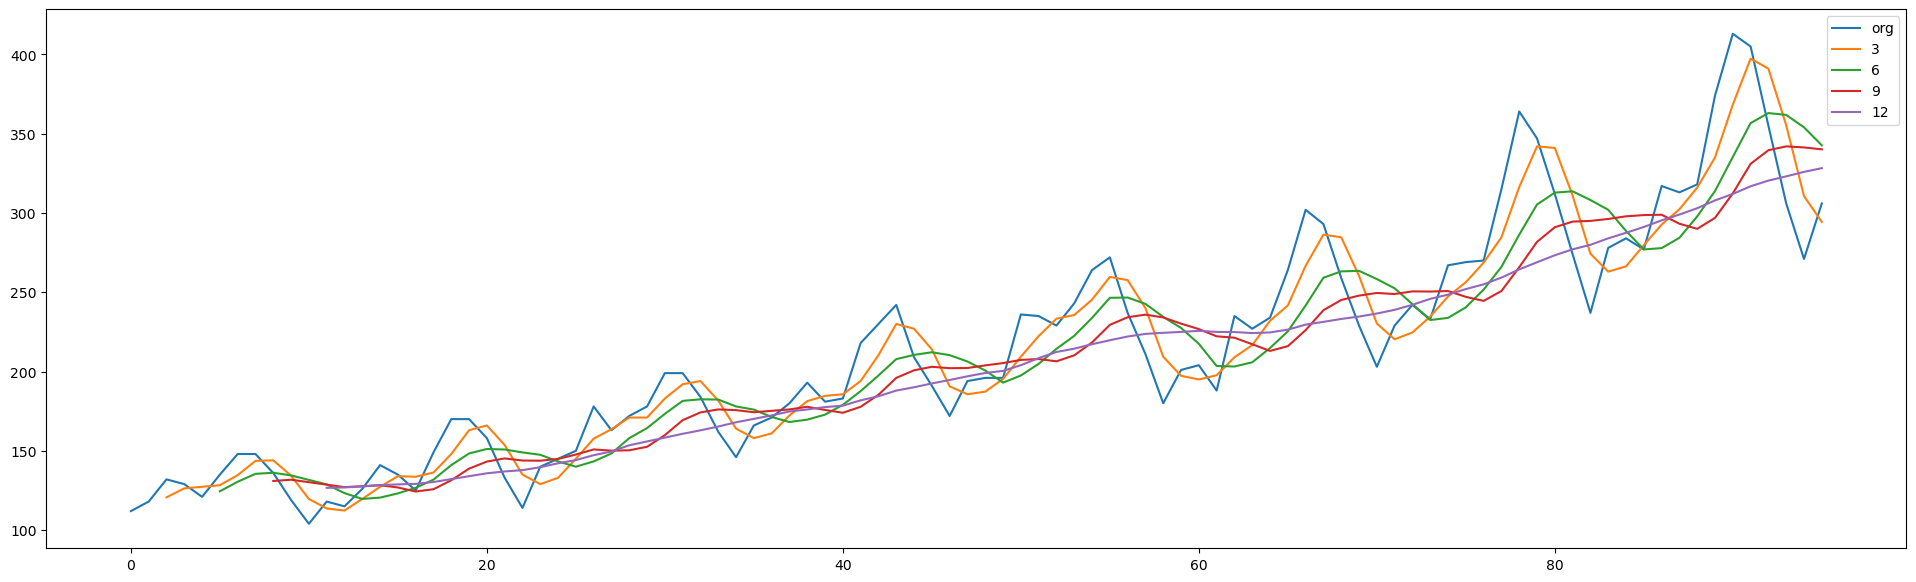

In [10]:
a=range(3,15,3)
plt.figure(figsize=(24,7))
airlines.Passengers.plot(label="org")
for i in a:
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

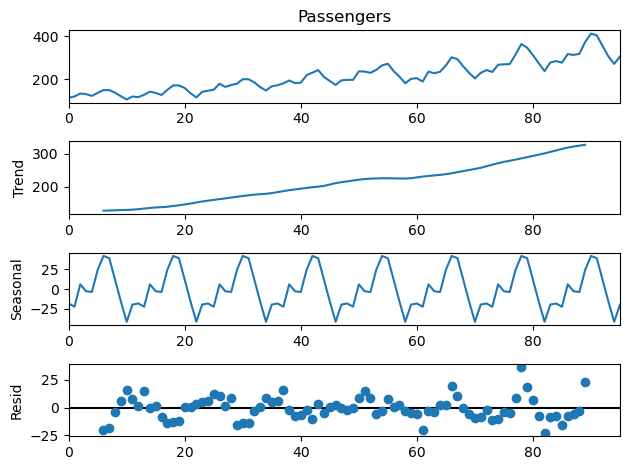

In [11]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### ACF and PACF plots

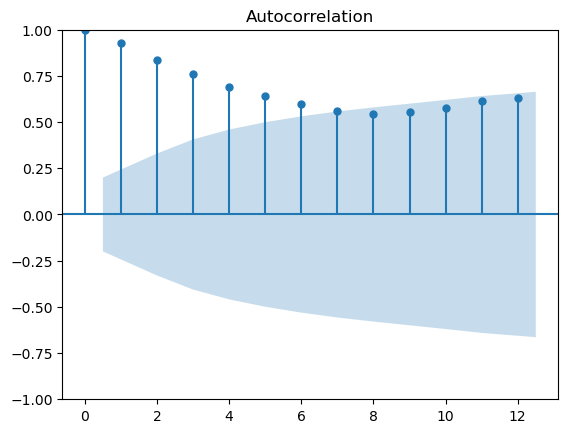

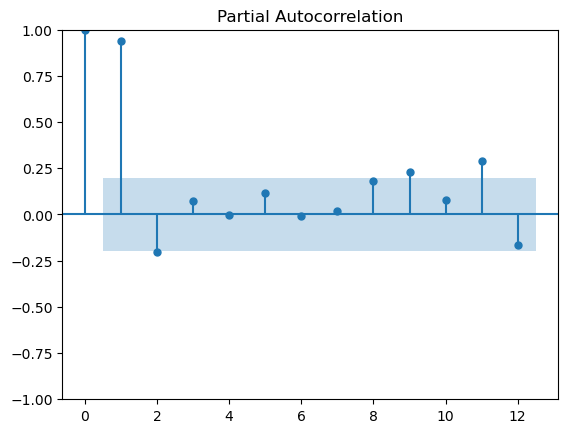

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

In [13]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [14]:
weights = np.array([0.1, 0.2, 0.3, 0.4])

### Weighted moving average

In [15]:
df=pd.DataFrame()
df['Passengers']=airlines.Passengers
df['WMA'] = df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Passengers,WMA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7


### Plotting weighted moving average

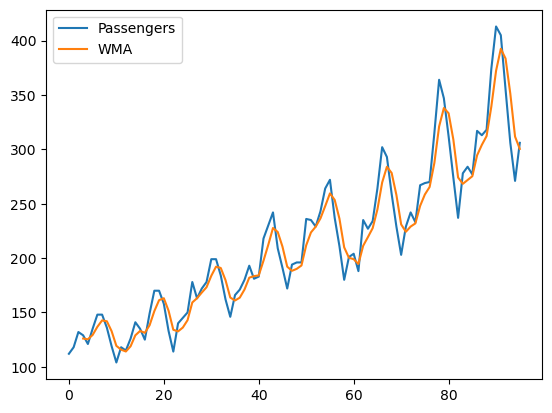

In [16]:
df.Passengers.plot(kind='line')
df.WMA.plot(kind='line')
plt.legend()

### Simple exponential smoothing

In [17]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

11.375850554268187

### Plotting for predictions for test data

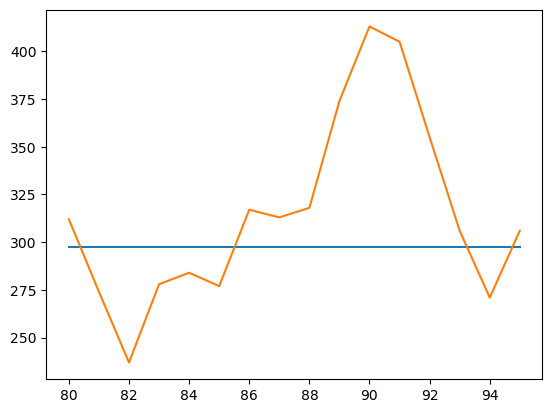

In [18]:
plt.plot(pred_ses)
plt.plot(test.Passengers)

### Predictions for the whole data

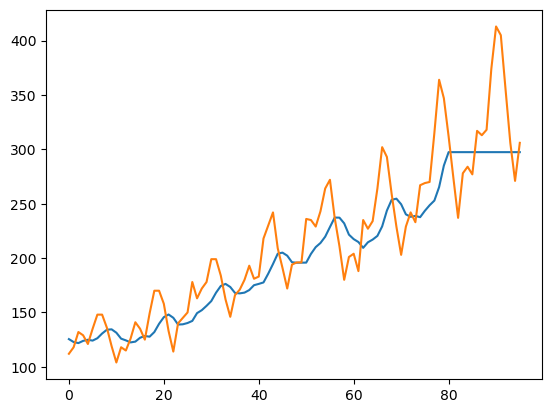

In [19]:
plt.plot(ses_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### Running a loop to find the best smoothing level value

In [20]:
acc_ses={}
for i in range(101):
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i/100)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    acc_ses[MAPE(pred_ses,test.Passengers)]=i

print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))
    

24:11.01637714807814


### Building a model with 0.24 as the smoothing level value

In [21]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

11.01637714807814

### Plotting the predictions on test data

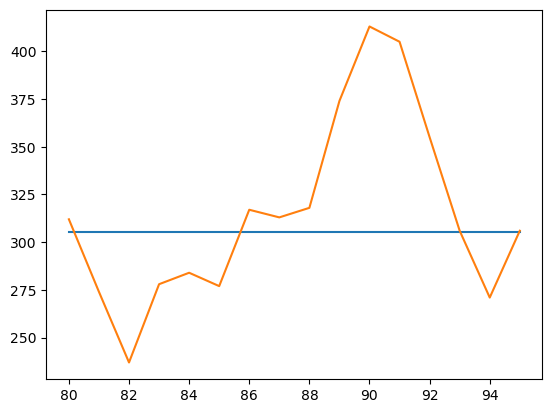

In [22]:
plt.plot(pred_ses)
plt.plot(test.Passengers)

### Plotting the predictions of the whole data

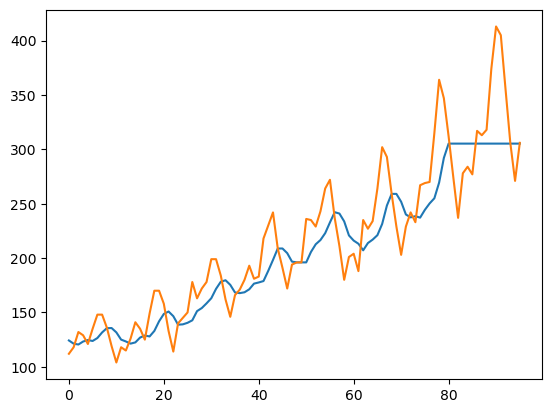

In [23]:
plt.plot(ses_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### Building a model with holt method

In [24]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

59.933366922606936

### Plotting the predictions on test data

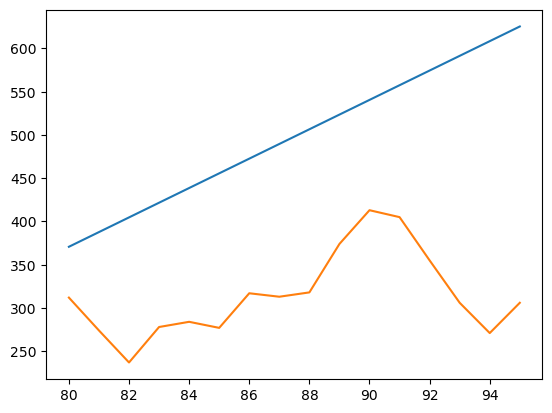

In [25]:
plt.plot(pred_holt)
plt.plot(test.Passengers)

### Plotting the predictions of the whole data¶

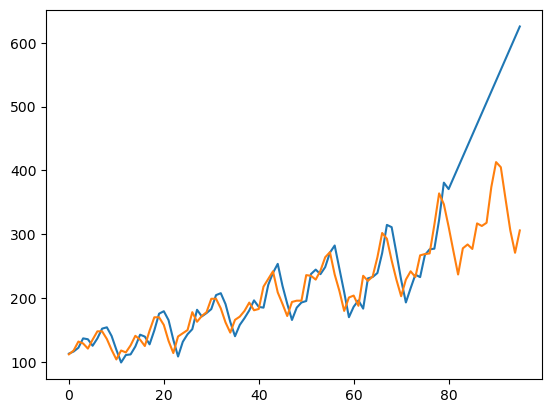

In [26]:
plt.plot(holt_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### running a loop to find the best hyper parameters

In [27]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model = Holt(train["Passengers"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
        pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
        accuracy[MAPE(pred_holt,test.Passengers)]=(i,j)
        

        

In [28]:
accuracy[min(accuracy.keys())]

(2, 63)

In [29]:
min(accuracy.keys())

10.25753529177384

### Building a model with smoothing level=0.02 and smoothing slope=0.63

In [30]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.02, smoothing_slope=0.63)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

10.25753529177384

### Plotting the predictions on test data

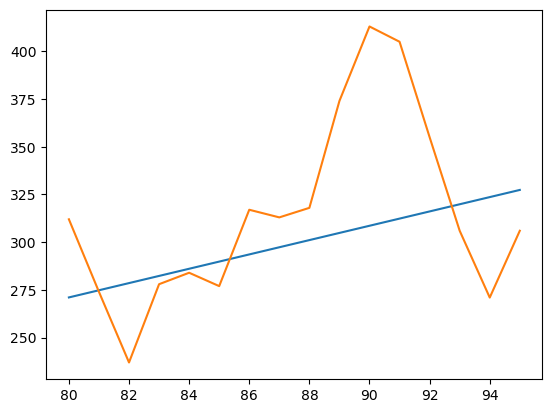

In [31]:
plt.plot(pred_holt)
plt.plot(test.Passengers)

### Plotting the predictions of the whole data

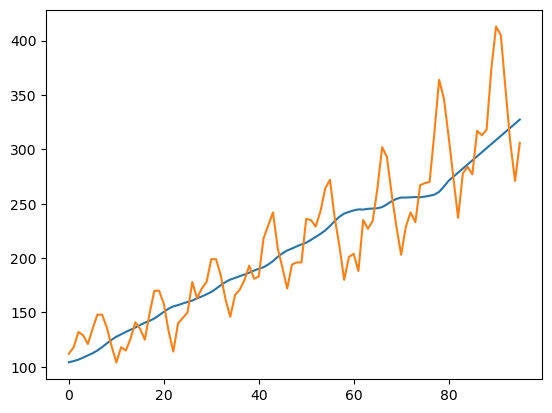

In [32]:
plt.plot(holt_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### Building a model using holt winters method

### from the moving averages plotted earlier,it can be seen that the best seasonal periods value is 12

In [33]:
hw_add_add = ExponentialSmoothing(train["Passengers"],seasonal='add', trend='add',seasonal_periods=12).fit()
pred_hw_add = hw_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw_add,test.Passengers)

7.949424050264893

### Plotting the predictions on the test data

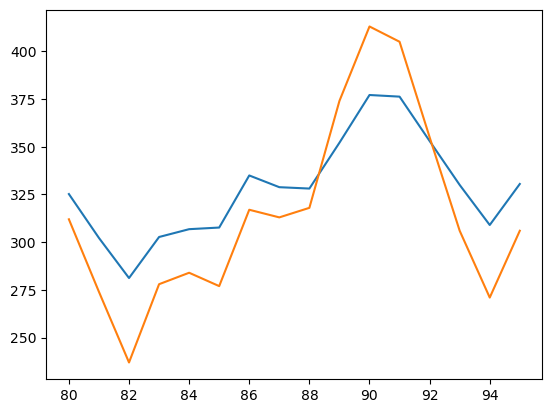

In [34]:
plt.plot(pred_hw_add)
plt.plot(test.Passengers)

### Plotting the predictions on whole data

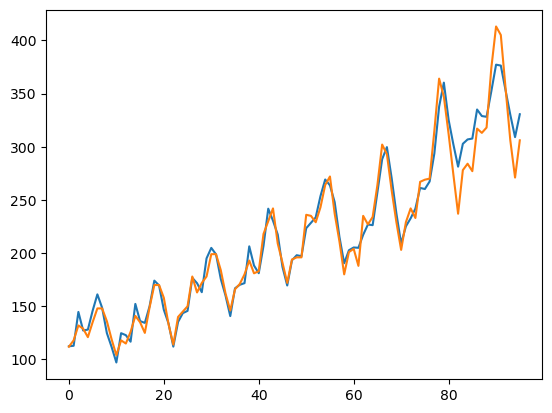

In [35]:
plt.plot(hw_add_add.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### Running a loop to find the best hyperparameters

In [36]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw = ExponentialSmoothing(train["Passengers"],seasonal=i, trend=j,seasonal_periods=12).fit()
        pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
        acc_hw[MAPE(pred_hw,test.Passengers)]=(i,j)
    

In [37]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [38]:
min(acc_hw.keys())

1.8507570249713923

### Building a model with both seasonal and trend to be multiplicative

In [39]:
hw = ExponentialSmoothing(train["Passengers"],seasonal='mul', trend='mul',seasonal_periods=12).fit()
pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

1.8507570249713923

### Plotting the predictions on the test data¶

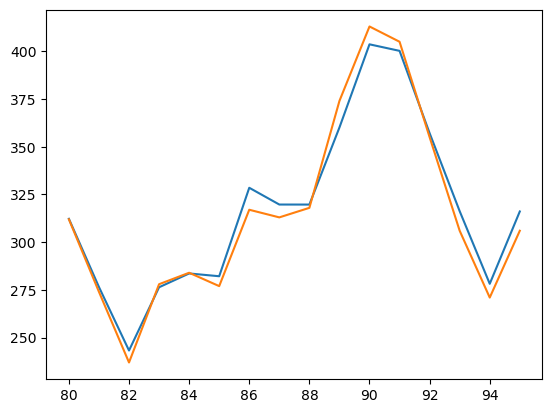

In [40]:
plt.plot(pred_hw)
plt.plot(test.Passengers)

### Plotting the predictions on whole data

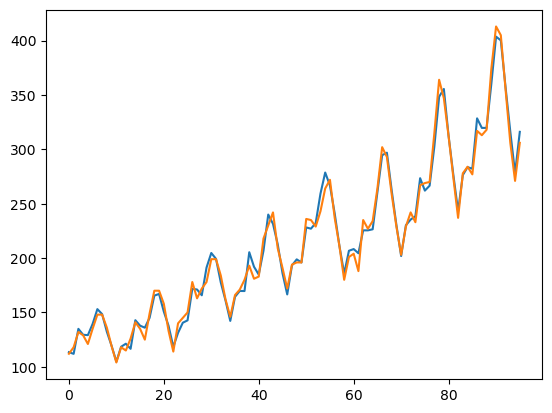

In [41]:
plt.plot(hw.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

### Conclusions

#### Simplle Exponential smoothing

Best smoothing level value was found to be 0.24. Model built with this value has an rms error value of 11.01.

#### Holt's model

Best smoothing level value was found to be 0.02 and smoothing_slope value to be 0.63. Model built with these parameters have an rms error value of 10.25

#### Holt-Winters method

Putting both seasonal and trend to be multiplicative gives best results. The model built with these parameters give an rms error of 1.85

### So Holt winters model is taken as the final model

In [42]:
model_final=hw